In [16]:
import requests
import json
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt
host = '10.10.1.37:11000'
image_file = '/home/hung/Data/IDCards/IDcard/cccd-chip-front/back22_11_2022_01_34_51.jpg'
image_file = '/home/dark_hold/AI/ocr/test_hung.jpg'
image_file = '/home/dark_hold/AI/ocr/test_images/test.jpg'
image_file = '/home/leon/Downloads/1666233625385_iv_front.jpg'
image_file = '/home/dark_hold/AI/ocr/test_images/test_cccd_old.jpg'
image_file = '/home/dark_hold/AI/Leon/eKYC/warped/cccd_chip/front/warped_4_front.jpg'
image_file = '/home/dark_hold/AI/Leon/eKYC/warped/cccd_chip/front/warped_14_front.jpg'
image_file = '/home/dark_hold/AI/Leon/eKYC/warped/cccd_chip/front/warped_334_front.jpg'
# image_file = '/home/dark_hold/AI/Leon/eKYC/warped/cccd_chip/front/warped_30_front.jpg'
# image_file = '/home/dark_hold/AI/Leon/eKYC/warped/cccd_chip/front/warped_239_front.jpg'

post_params = dict(remove_anomalies=True, max_merging_iterations=3, closeness_threshold=10)
post_params = dict(remove_anomalies=False,  max_merging_iterations=0, closeness_threshold=0, output_features=['fulltext'])
with open(image_file, 'rb') as f:
    result = requests.post(f'http://{host}/ocr', files=dict(image=f), data=post_params)
    result = json.loads(result.content.decode('utf-8'))
    result = result['results'][0]
    

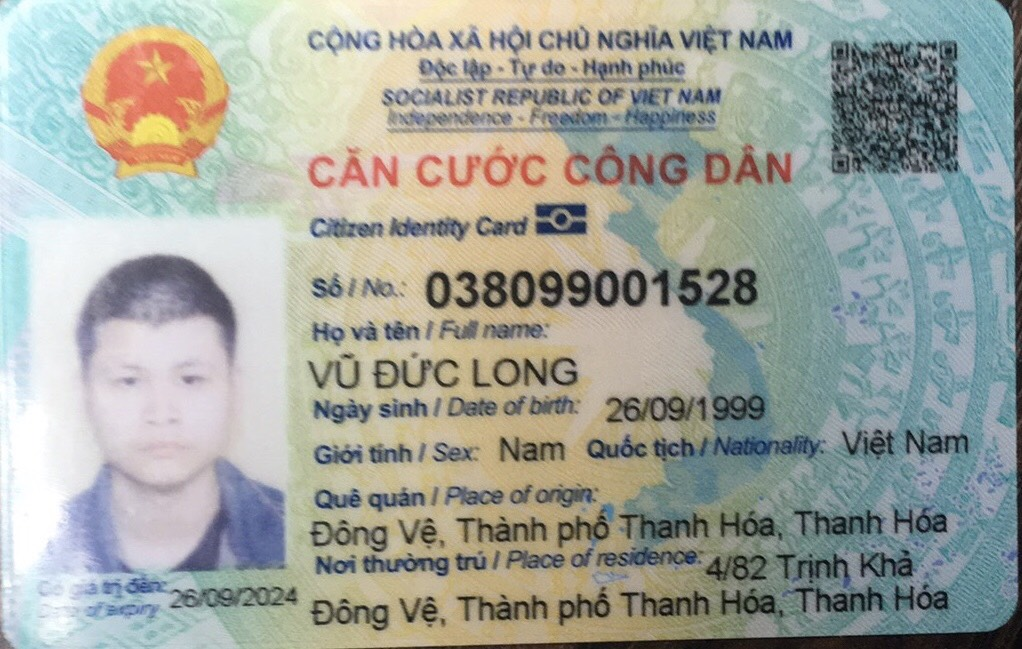

In [17]:
Image.open('/home/dark_hold/AI/ocr/test_images/test.jpg')
# with open(image_file, 'rb') as f:
#     print(f.read())

In [18]:
result

{'image': None,
 'page_number': 0,
 'width': 1500,
 'height': 951,
 'boxes': [[539, 36, 632, 90],
  [418, 37, 539, 94],
  [632, 42, 688, 87],
  [654, 85, 699, 130],
  [693, 40, 765, 85],
  [857, 38, 980, 90],
  [983, 39, 1069, 84],
  [920, 84, 996, 129],
  [769, 44, 851, 88],
  [1071, 44, 1167, 92],
  [318, 91, 352, 120],
  [773, 90, 812, 124],
  [587, 90, 652, 133],
  [724, 92, 768, 131],
  [836, 91, 916, 129],
  [977, 136, 1054, 171],
  [996, 101, 1093, 136],
  [530, 133, 694, 169],
  [695, 133, 853, 167],
  [856, 133, 904, 167],
  [756, 167, 877, 201],
  [904, 135, 977, 168],
  [541, 171, 729, 201],
  [901, 172, 1044, 201],
  [426, 220, 567, 293],
  [1020, 219, 1168, 293],
  [588, 222, 790, 293],
  [810, 222, 1006, 293],
  [761, 334, 793, 364],
  [762, 304, 790, 334],
  [420, 323, 536, 369],
  [536, 322, 668, 374],
  [670, 324, 755, 368],
  [580, 394, 1092, 457],
  [422, 411, 475, 455],
  [497, 413, 569, 456],
  [1387, 449, 1413, 472],
  [425, 478, 475, 532],
  [481, 478, 525, 532],

In [35]:
coord =  [[[i[0],i[1]], [i[2],i[1]], [i[2], i[3]], [i[0], i[3]]]  for i in result['boxes']] 
import numpy as np

label =  np.zeros((2, len(result['texts']) + 3, len(result['texts'])), int)
# coord
data = {
    "data_id": image_file,
    "fields": ["question","answer","header"],
    "field_rs": [],
    "text": result['texts'],
    "label":label.tolist(),
    "coord": coord,
    "img_sz": {"width": result["width"] , "height": result["height"]},
    "img_feature": None, "img_url": None
}
import json
with open('./data/raw/huy_raw.jsonl', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False)

In [3]:
import torch
import json
import numpy as np
# f = open('./data/processed/long_old.jsonl')
f = open('./data/processed/truong.jsonl')
data_long = json.load(f)
graph_s = np.array(data_long['label'])
label = torch.tensor(graph_s[0, :3, :])
# pred = torch.argmax(pred,dim =0)
print(data_long['text'])
import networkx as nx
# G = nx.Graph(s1[0].numpy())
S_ = graph_s[0, 3:, :]
G_ = graph_s[1, 3:, :]


question_heads = [i for i, ele in enumerate(label[0]) if ele != 0]
answer_heads = [i for i, ele in enumerate(label[1]) if ele != 0]
header_heads = [i for i, ele in enumerate(label[2]) if ele != 0]
# header_heads


['HÒA', 'Độc', 'CHỦ', 'Hạnh', 'NGHIA', 'XÃ', 'lập', 'HỘI', 'VIỆT', 'phúc', 'CỘNG', 'NAM', 'H', 'do', 'Tự', '-', 'OF', 'VIỆT', 'NAM', 'SOCIALIST', 'REPUBLIC', 'Independence', 'Freedom', 'Happiness', 'DÂN', 'CƯỚC', 'CĂN', 'CÔNG', 'o', 'Card', 'Citizen', 'Identity', '01', 'Số', '019085000034', 'No', 'FFUI', 'Họ', 'và', 'tên', 'NGUYỄN', 'SƠN', 'sinh', 'Date', 'Ngày', 'name:', 'TRƯỞNG', 'birth:', 'of', '29/03/1985', 'Quốc', 'Việt', 'Nam', 'Nam', 'Nationality', 'tịch', 'Giới', 'tính', 'Sex', 't', 'of', 'quán', 'Tiên', 'Lữ,', 'Dũng,', 'Hưng', 'Trung', 'Place', 'residence', 'Nơi', 'thường', '107A', 'Cầu', 'Place', 'origin', 'Quê', 'Yên', 'of', '-', 'A21', 'Giấy,', 'trú', 'Dạte', 'giá', 'cá', 'Có', 'đến', 'trị', 'trúc', '29/03/2025', 'Tồ', 'Hà', 'Nội', 'TT', '8,', 'Đồng', 'Xa', 'Mai', 'Dịch,']


In [4]:

# G = nx.Graph(graph_s[1,3:,:]) # group
# G.edges


In [7]:

from graph_stuff import get_strings, get_qa
question_heads
answer_heads
header_heads

heads = header_heads
# header_heads

ques = get_strings(question_heads, data_long['text'], S_)
# question_heads
ques


[[33, 'Số No'],
 [37, 'Họ và tên FFUI name:'],
 [44, 'Ngày sinh Date of birth:'],
 [50, 'Quốc tịch Nationality'],
 [56, 'Giới tính Sex'],
 [69, 'Nơi thường trú Place of residence'],
 [75, 'Quê quán Place of origin'],
 [85, 'Có giá trị đến Dạte']]

In [8]:
ans = get_strings(answer_heads, data_long['text'], S_)
ans


[[34, '019085000034'],
 [40, 'NGUYỄN SƠN TRƯỞNG'],
 [49, '29/03/1985'],
 [51, 'Việt Nam'],
 [53, 'Nam'],
 [66, 'Trung Dũng, Tiên Lữ, Hưng Yên'],
 [71, '107A - A21 TT Đồng Xa Tồ 8, Mai Dịch, Cầu Giấy, Hà Nội'],
 [89, '29/03/2025']]

In [9]:
from jsonmerge import merge
resul_ = {}
for ques_idx in question_heads:
    q_, a_ = get_qa(ques_idx, ques, ans, G_)
    resul_ = merge(resul_, {q_: a_})
    # print(get_ques_ans(ques_idx, ques,ans))
print(resul_)


{'Số No': '019085000034', 'Họ và tên FFUI name:': 'NGUYỄN SƠN TRƯỞNG', 'Ngày sinh Date of birth:': '29/03/1985', 'Quốc tịch Nationality': 'Việt Nam', 'Giới tính Sex': 'Nam', 'Nơi thường trú Place of residence': '107A - A21 TT Đồng Xa Tồ 8, Mai Dịch, Cầu Giấy, Hà Nội', 'Quê quán Place of origin': 'Trung Dũng, Tiên Lữ, Hưng Yên', 'Có giá trị đến Dạte': '29/03/2025'}


In [12]:
import json
with open('output.json', 'w', encoding='utf-8') as f:
    json.dump(resul_, f, ensure_ascii=False)